In [1]:
import os
import time
import uuid
import cv2

In [2]:
images_path=r"C:\Users\HP\Desktop\python\Deep learning projects\face detection project\data\images"
number_images=13

In [3]:

# cap = cv2.VideoCapture(0)

# if not cap.isOpened():
#     print("Error: Camera not found or cannot be opened.")
#     exit()

# for imgnum in range(number_images):
#     print("Collecting images {}".format(imgnum))
#     ret, frame = cap.read()
    
#     if not ret:
#         print("Error: Unable to capture a frame.")
#         break

#     imgname = os.path.join(images_path, f"{str(uuid.uuid1())}.jpg")
#     cv2.imwrite(imgname, frame)
#     cv2.imshow('frame', frame)
#     time.sleep(0.5)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()


In [41]:
# !labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\HP\.labelmerc


### **Review Dataset and build image loading functions**

In [3]:
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt

In [4]:
images=tf.data.Dataset.list_files("data\\images\\*.jpg",shuffle=False)

In [5]:
images.as_numpy_iterator().next()

b'data\\images\\1c1f62d9-7025-11ee-be78-c85acf45a469.jpg'

In [6]:
def load_image(x):
    byte_img=tf.io.read_file(x)
    img=tf.io.decode_jpeg(byte_img)
    return img

In [7]:
images=images.map(load_image)

In [8]:
images.as_numpy_iterator().next()

array([[[162, 157, 135],
        [161, 156, 134],
        [158, 153, 131],
        ...,
        [133, 106,  87],
        [134, 107,  86],
        [135, 108,  87]],

       [[158, 153, 131],
        [160, 155, 133],
        [160, 155, 133],
        ...,
        [133, 106,  87],
        [135, 108,  87],
        [136, 109,  88]],

       [[160, 156, 131],
        [165, 161, 136],
        [168, 164, 139],
        ...,
        [130, 103,  84],
        [129, 102,  81],
        [130, 104,  81]],

       ...,

       [[147, 149, 112],
        [148, 149, 115],
        [140, 143, 114],
        ...,
        [140, 141, 136],
        [135, 138, 131],
        [124, 127, 120]],

       [[149, 151, 114],
        [149, 150, 116],
        [143, 146, 117],
        ...,
        [127, 132, 126],
        [126, 133, 125],
        [123, 133, 124]],

       [[153, 155, 118],
        [151, 152, 118],
        [144, 147, 120],
        ...,
        [127, 134, 127],
        [121, 131, 122],
        [114, 126, 116]]

In [9]:
image_generator=images.batch(4).as_numpy_iterator()

In [10]:
plot_images=image_generator.next()

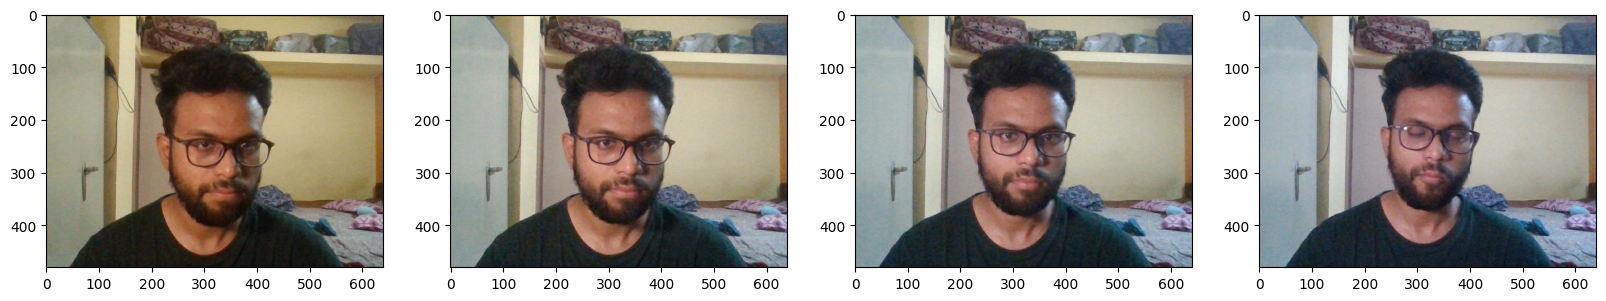

In [11]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()


### **partition augmented data** 

In [17]:
# for folder in ['train', 'test', 'val']:
#     for file in os.listdir(os.path. join('data', folder, 'images') ):
#         filename = file.split('.')[0]+'.json'
#         existing_filepath = os.path. join('data', 'labels', filename)
#         if os.path.exists(existing_filepath):
#             new_filepath = os.path. join( 'data', folder, 'labels', filename)
#             os.replace(existing_filepath, new_filepath)

In [12]:
import albumentations as alb

In [36]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [15]:
img=cv2.imread(os.path.join('data','train','images','1c1f62d9-7025-11ee-be78-c85acf45a469.jpg'))

In [61]:
with open(os.path.join('data','train','labels','1c1f62d9-7025-11ee-be78-c85acf45a469.json'),'r') as f:
    label=json.load(f)

In [62]:
label['shapes'][0]['points']

[[190.11173184357537, 61.78770949720672],
 [452.68156424581, 390.83798882681566]]

In [63]:
coords=[0,0,0,0]

coords[0]=label['shapes'][0]['points'][0][0]
coords[1]=label['shapes'][0]['points'][0][1]
coords[2]=label['shapes'][0]['points'][1][0]
coords[3]=label['shapes'][0]['points'][1][1]

In [64]:
coords=list(np.divide(coords,[640,480,640,480]))
coords

[0.29704958100558654,
 0.12872439478584732,
 0.7073149441340781,
 0.8142458100558659]

In [65]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [67]:
augmented['image']

array([[[ 24,  23,  19],
        [ 23,  22,  18],
        [ 19,  20,  16],
        ...,
        [118, 131, 129],
        [117, 130, 128],
        [119, 132, 130]],

       [[ 25,  24,  20],
        [ 21,  20,  16],
        [ 17,  18,  16],
        ...,
        [117, 130, 128],
        [119, 132, 130],
        [120, 133, 131]],

       [[ 26,  22,  21],
        [ 24,  20,  19],
        [ 20,  18,  17],
        ...,
        [115, 130, 126],
        [115, 130, 126],
        [114, 128, 124]],

       ...,

       [[104, 147, 162],
        [104, 147, 162],
        [104, 147, 164],
        ...,
        [142, 163, 164],
        [144, 165, 166],
        [142, 163, 165]],

       [[102, 145, 160],
        [102, 145, 160],
        [101, 145, 162],
        ...,
        [142, 166, 166],
        [142, 165, 167],
        [141, 164, 166]],

       [[ 97, 142, 156],
        [100, 143, 158],
        [101, 145, 162],
        ...,
        [143, 167, 167],
        [141, 164, 166],
        [141, 164, 166]]

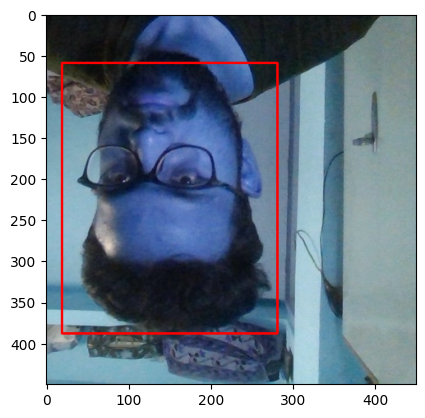

In [71]:
cv2.rectangle(
    augmented['image'],
    tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
    tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)),
    (255,0,0),2)

plt.imshow(augmented['image'])

In [72]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.39306913407821226, 0.938780260707635, 0.00811801675977648, 0.19506517690875233, 'face'].
x_max is less than or equal to x_min for bbox [0.997992318435754, 0.9946461824953445, 0.6881110335195529, 0.31145251396648044, 'face'].


### ****load augmented images to tensorflow dataset**** ###

In [73]:
train_images=tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg',shuffle=False)
train_images=train_images.map(load_image)
train_images=train_images.map(lambda x:tf.image.resize(x,(120,120)))
train_images=train_images.map(lambda x: x/255)

test_images=tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg',shuffle=False)
test_images=test_images.map(load_image)
test_images=test_images.map(lambda x:tf.image.resize(x,(120,120)))
test_images=test_images.map(lambda x: x/255)

val_images=tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg',shuffle=False)
val_images=val_images.map(load_image)
val_images=val_images.map(lambda x:tf.image.resize(x,(120,120)))
val_images=val_images.map(lambda x: x/255)

In [75]:
train_images.as_numpy_iterator().next()

array([[[0.47849265, 0.41072303, 0.34068626],
        [0.49479166, 0.4291054 , 0.3550858 ],
        [0.48645833, 0.4362745 , 0.33547795],
        ...,
        [0.8632353 , 0.8279412 , 0.6671569 ],
        [0.85539216, 0.82487744, 0.66292894],
        [0.8740196 , 0.8356005 , 0.66409314]],

       [[0.49074754, 0.4332108 , 0.3466299 ],
        [0.5158088 , 0.453125  , 0.36531863],
        [0.5242034 , 0.4696691 , 0.37015933],
        ...,
        [0.8661765 , 0.81911767, 0.6622549 ],
        [0.86170346, 0.82512254, 0.6657475 ],
        [0.8689951 , 0.83860296, 0.67242646]],

       [[0.40269607, 0.389951  , 0.34338236],
        [0.40098038, 0.37107843, 0.3313113 ],
        [0.4030637 , 0.37720588, 0.32824755],
        ...,
        [0.87199754, 0.8172181 , 0.6642157 ],
        [0.8783701 , 0.8313113 , 0.6822917 ],
        [0.8776348 , 0.82892156, 0.6730392 ]],

       ...,

       [[0.55851716, 0.5962623 , 0.5966299 ],
        [0.56096816, 0.59632355, 0.5765319 ],
        [0.5139706 , 0

# **Prepare labels** #

In [101]:
def load_label(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [102]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_label, [x], [tf.uint8, tf.float16]))

test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_label, [x], [tf.uint8, tf.float16]))

val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_label, [x], [tf.uint8, tf.float16]))

In [103]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3408, 0.1173, 0.9243, 0.8486], dtype=float16))

In [98]:
# Corrected code
next_element = next(test_labels.as_numpy_iterator())

# Access the elements as needed
class_label, bbox = next_element

# You can print or use the class_label and bbox as desired
print("Class Label:", class_label)
print("Bounding Box:", bbox)


Class Label: [1]
Bounding Box: [0.      0.04916 0.5483  0.851  ]


### **Combine label and image samples** ### 

In [105]:
train=tf.data.Dataset.zip((train_images,train_labels))
train=train.shuffle(5000)
train=train.batch(8)
train=train.prefetch(4)

test=tf.data.Dataset.zip((test_images,test_labels))
test=test.shuffle(1300)
test=test.batch(8)
test=test.prefetch(4)

val=tf.data.Dataset.zip((val_images,val_labels))
val=val.shuffle(1000)
val=val.batch(8)
val=val.prefetch(4)

In [108]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [109]:
data_samples=train.as_numpy_iterator()

In [121]:
res=data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


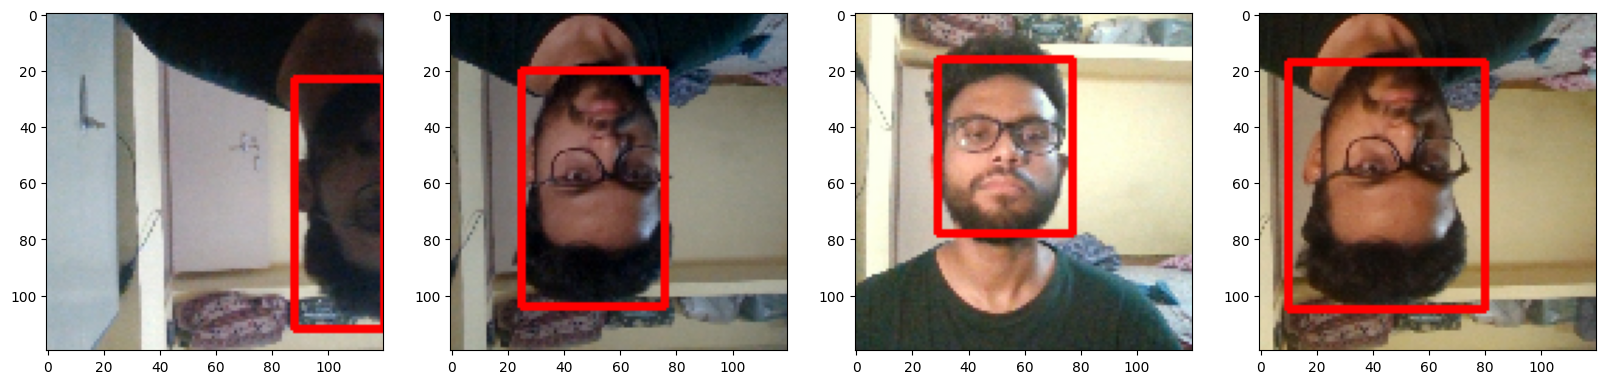

In [122]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# Build a deep learning network using functional api #

In [124]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.applications import VGG16

In [125]:
vgg=VGG16(include_top=False)

58889256/58889256 [==============================] - 5s 0us/step


In [126]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [133]:
def build_model():
    input_layer=Input(shape=(120,120,3))

    vgg=VGG16(include_top=False)(input_layer)

    f1=GlobalMaxPooling2D()(vgg)
    class1=Dense(2048,activation='relu')(f1)
    class2=Dense(1,activation='sigmoid')(class1)

    f2=GlobalMaxPooling2D()(vgg)
    regress1=Dense(2048,activation='relu')(f2)
    regress2=Dense(1,activation='sigmoid')(regress1)

    facetracker=Model(inputs=input_layer,outputs=[class2,regress2])

    return facetracker



In [134]:
facetracker=build_model()
facetracker.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_6[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d_4 (Gl  (None, 512)                  0         ['vgg16[0][0]']               
 obalMaxPooling2D)                                                                                
                                                                                            

In [141]:
train.as_numpy_iterator().next()

(array([[[[2.11397056e-02, 2.89828423e-02, 1.72181372e-02],
          [9.92647093e-03, 2.22426467e-02, 0.00000000e+00],
          [1.28676475e-03, 1.77696086e-02, 0.00000000e+00],
          ...,
          [4.76838231e-01, 5.77328444e-01, 5.65563738e-01],
          [5.00612736e-01, 5.88357866e-01, 5.80024481e-01],
          [5.12316167e-01, 5.75061262e-01, 5.73529422e-01]],
 
         [[1.25000002e-02, 2.68382356e-02, 2.14460795e-03],
          [1.27450982e-02, 3.62745114e-02, 6.12745134e-05],
          [8.76225531e-03, 2.93504894e-02, 1.40931376e-03],
          ...,
          [4.82291669e-01, 5.80330908e-01, 5.68566203e-01],
          [5.07598042e-01, 5.96629918e-01, 5.87867618e-01],
          [5.05392134e-01, 5.76960802e-01, 5.81372559e-01]],
 
         [[1.53186275e-02, 2.70833336e-02, 0.00000000e+00],
          [1.92401968e-02, 4.27696072e-02, 3.55392159e-03],
          [8.82352982e-03, 3.62745114e-02, 8.76225531e-03],
          ...,
          [5.10232866e-01, 6.08762264e-01, 5.9699

In [142]:
X,y=train.as_numpy_iterator().next()

In [144]:
classes,coords=facetracker.predict(X)
classes

1/1 [==============================] - 0s 389ms/step


array([[0.7514527 ],
       [0.69884807],
       [0.7078849 ],
       [0.6186747 ],
       [0.69270617],
       [0.64952844],
       [0.6298551 ],
       [0.67597747]], dtype=float32)

In [145]:
len(train)

458

In [146]:
batches_per_epoch=len(train)
lr_decay=(1/0.75-1)/batches_per_epoch

In [152]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [156]:
class_loss=tf.keras.losses.BinaryCrossentropy()
regressloss=localization_loss

In [162]:
localization_loss(y[1],coords)

IndexError: index 3 is out of bounds for axis 1 with size 1

In [163]:
regressloss(y[1],coords)

IndexError: index 3 is out of bounds for axis 1 with size 1

In [171]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch,opt, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [172]:
model = FaceTracker(facetracker)

In [191]:
model.compile(opt, classloss, regressloss)

NameError: name 'opt' is not defined